In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

# Part 1

In [2]:
crime_data=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
crime_data1=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
crime_data2=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

## Weekly patterns

In [4]:
# prepar such that we get lables on plot in weekly order.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(days,range(len(days))))
crime_data['Day_id'] = crime_data['DayOfWeek'].map(sorterIndex)

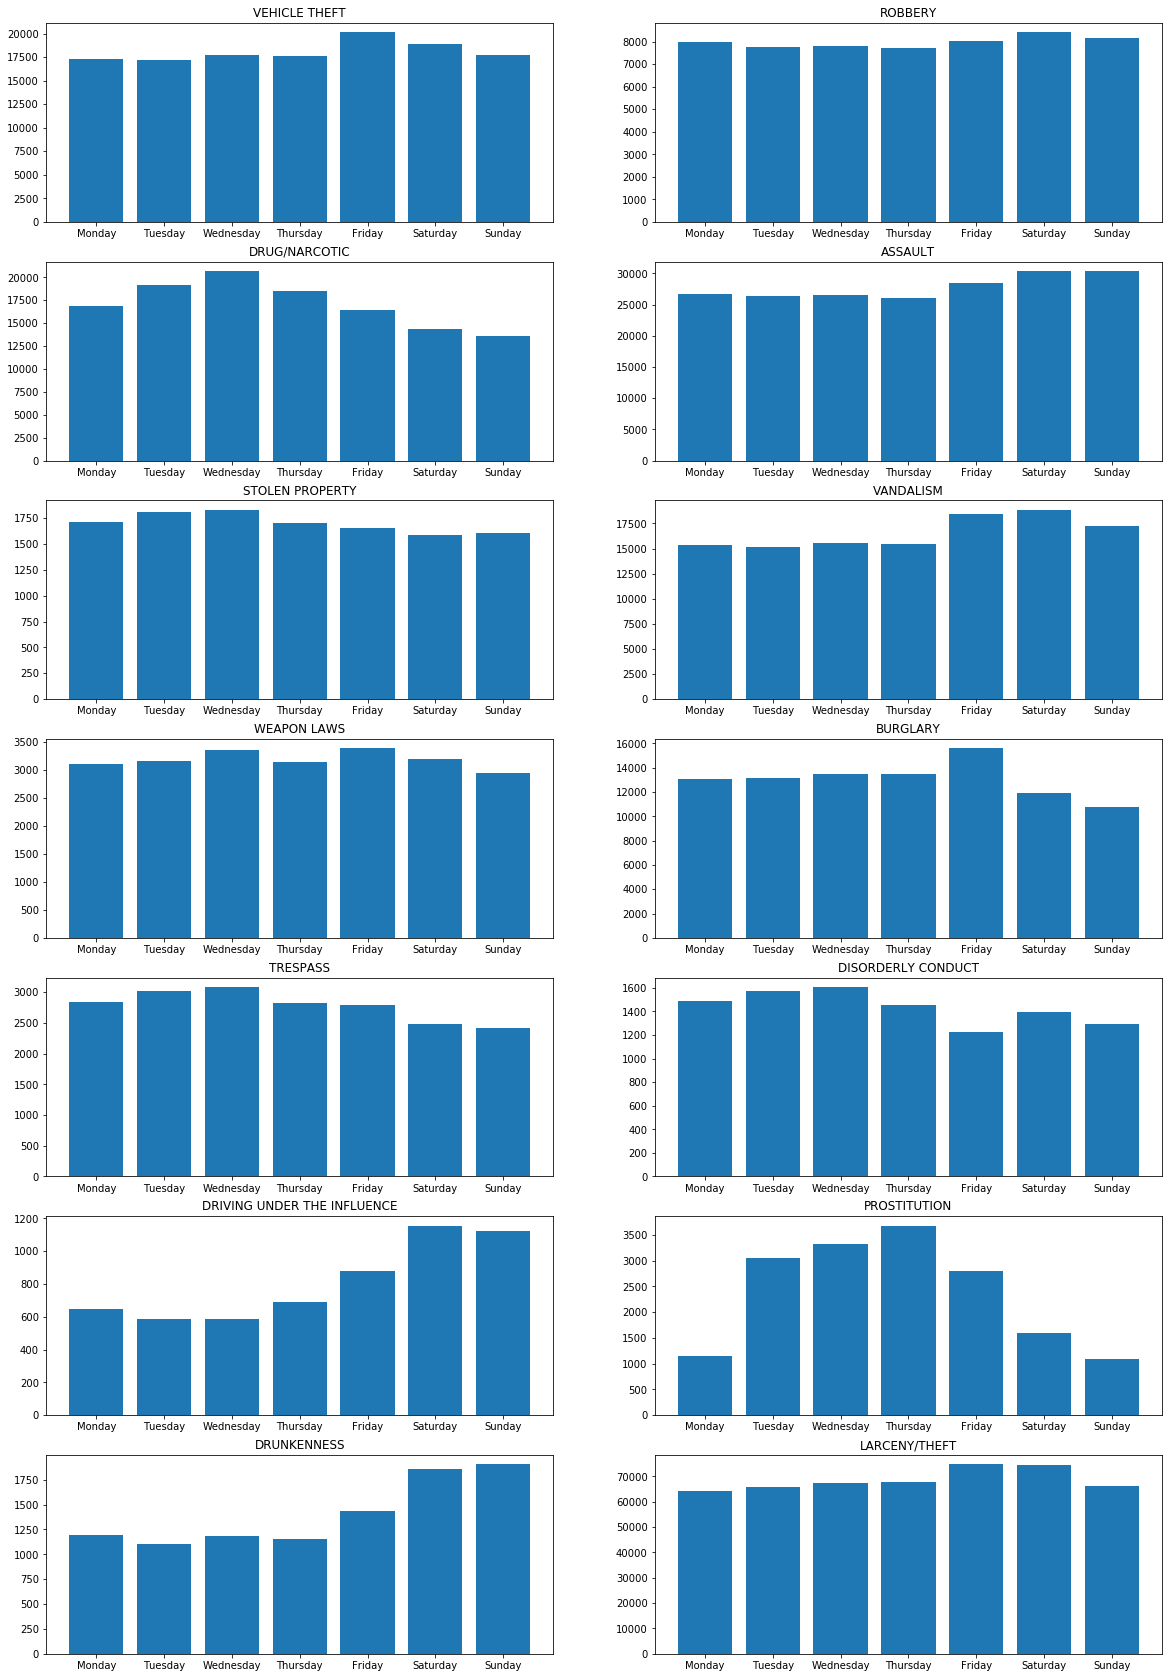

In [5]:
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(days)), xticklabels=days)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=crime_data[crime_data.Category==crime].Day_id.value_counts().sort_index()
    axs[i].bar(focus_crime_count.index.tolist(), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1
plt.show()

Based on the above plots a few supprising observations can be made. For instance disorderly conduct peaks at tuesday and weedensday. Also stolen property and trespass follows a similar pattern. Even more pronounced is the tendency shown for prostitution, where there is a clear peak on thursdays, and with a noticablly high number of reports from Tuesday to Friday. When focusing on Drugs it is supprising to notice that the peak in number of reports occure on Wednesday, and that the lowest number of reports are made on Friday, Saturday and Sunday in that respectivly order.

## Yearly patterns

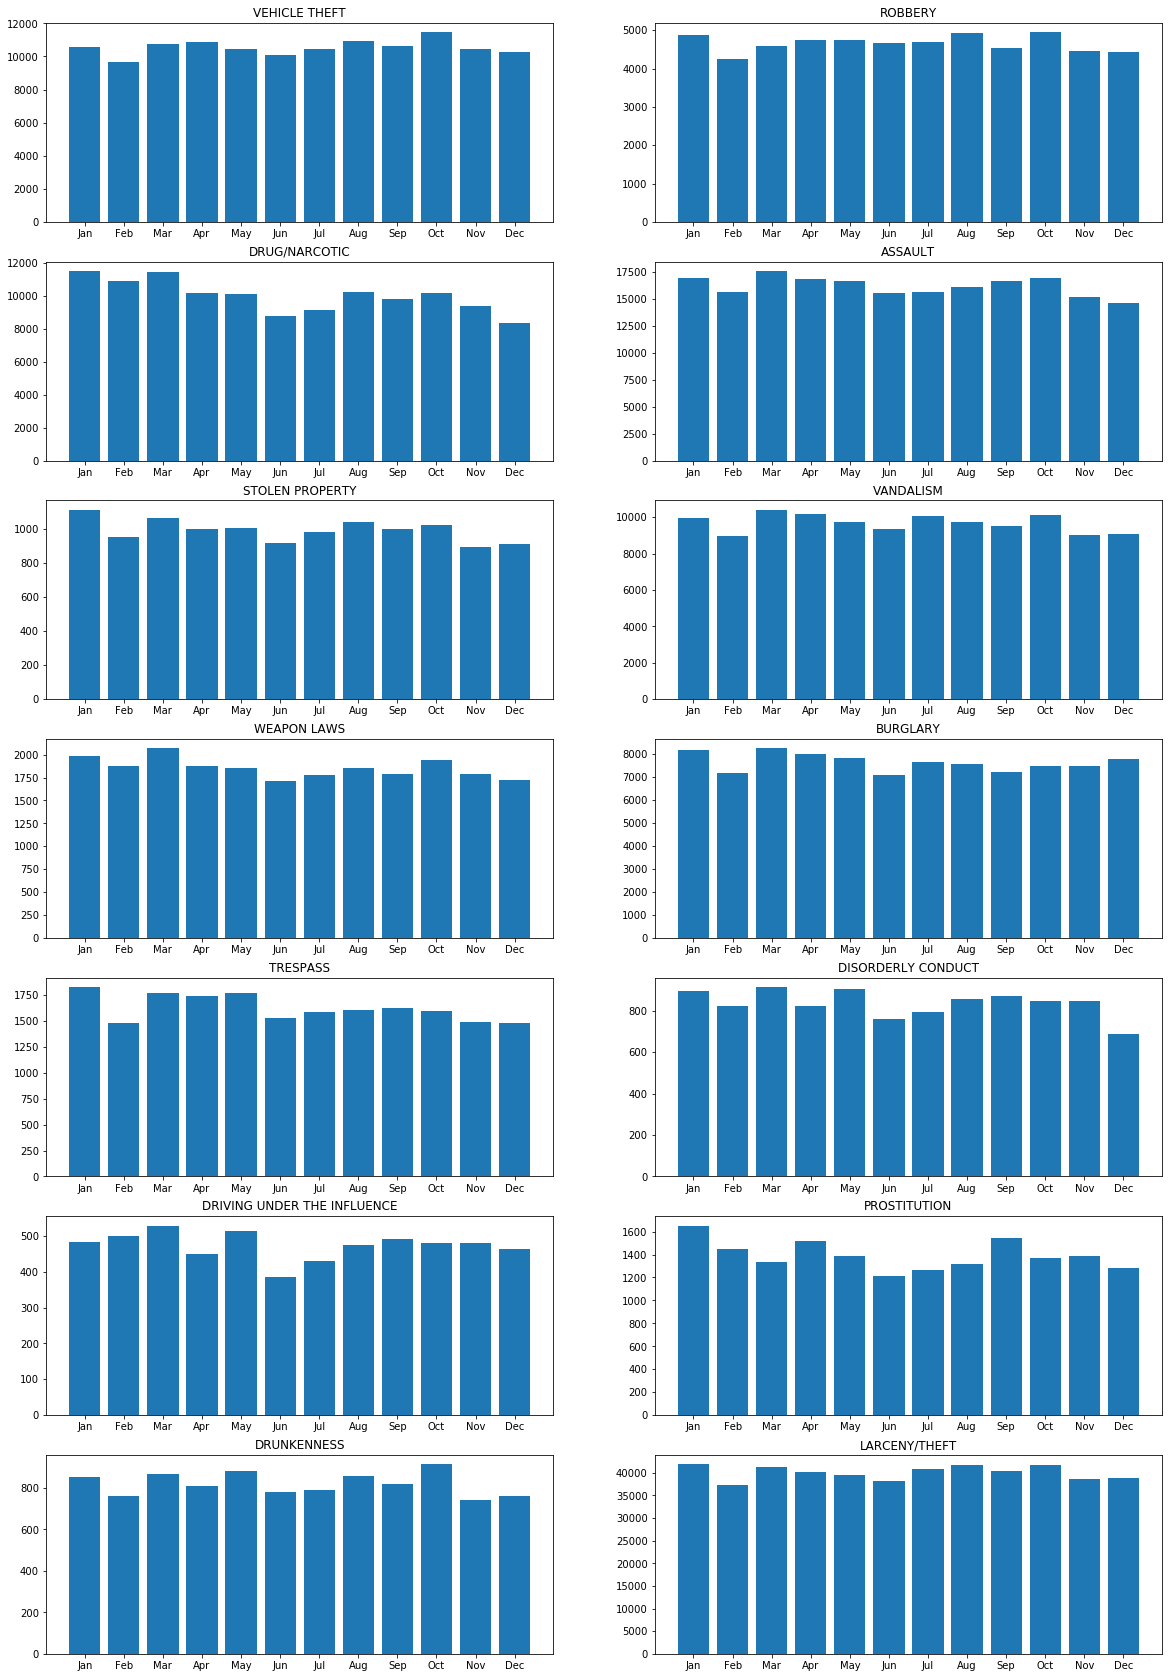

In [6]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(months)), xticklabels=months)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=pd.DatetimeIndex(crime_data[crime_data.Category==crime].Date).month.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1
plt.show()

The yearly patterns overall show that the number of reports pr. month does not varrie a lot. However there is a few interesting observations to be made. For instance June appear to be a month with few reports for all crimes types, compared to other months. This could indicate that there is less crime occuring in this month, or it could be indicating that less reports are made due to few police officers, since it is vecation season. For most crime types January appear to be a high crime month.

## The 24 hour cycle

In [7]:
from datetime import datetime

In [8]:
crime_data['Time']=pd.to_datetime(crime_data['Time'])

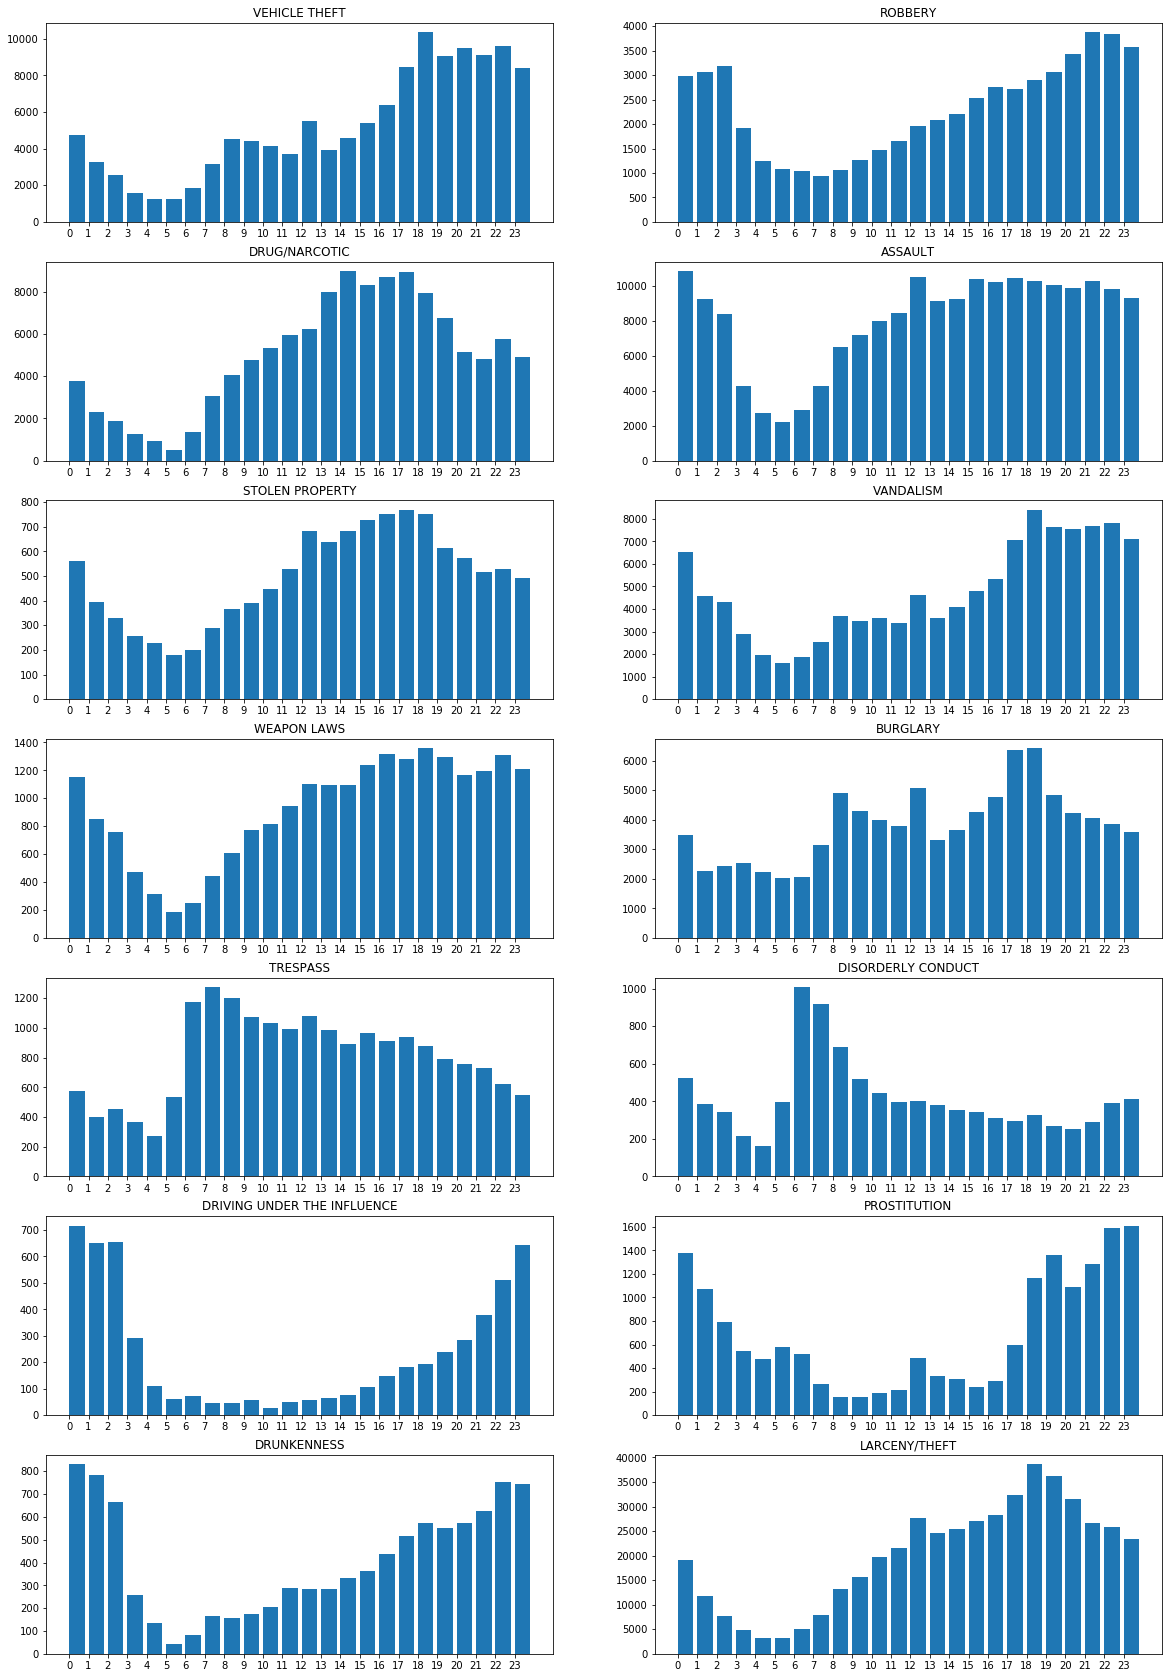

In [9]:
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(pd.DatetimeIndex(crime_data.Time).hour.value_counts())))
axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=pd.DatetimeIndex(crime_data[crime_data.Category==crime].Time).hour.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist(),align='edge')
    axs[i].set_title(crime)
    i+=1
plt.show()

For prostitution it can be observed that from 0-7 the number of reports are decreasing and then stay low until 17 where it starts to increas again. However there is a very noticable break from this pattern from 12 to 13. A similar pattern where the number of reports are high during neight and low during morning and day hours can also be observed for **Driving under the influence**. **Weapon laws**, **Burglary** , **Robbery**, **Larcent/Theft**, **Assault** and **Drunkness** all have a steap decline in number of reports in the early morning hours around 5.
The pattern observed for **Disorderly conduct** stands out from the rest of the crimes. Here a very clear peak is observed at 6-7, and after a decline a smaller peak can be observed at 0-1.

## Hours of the week

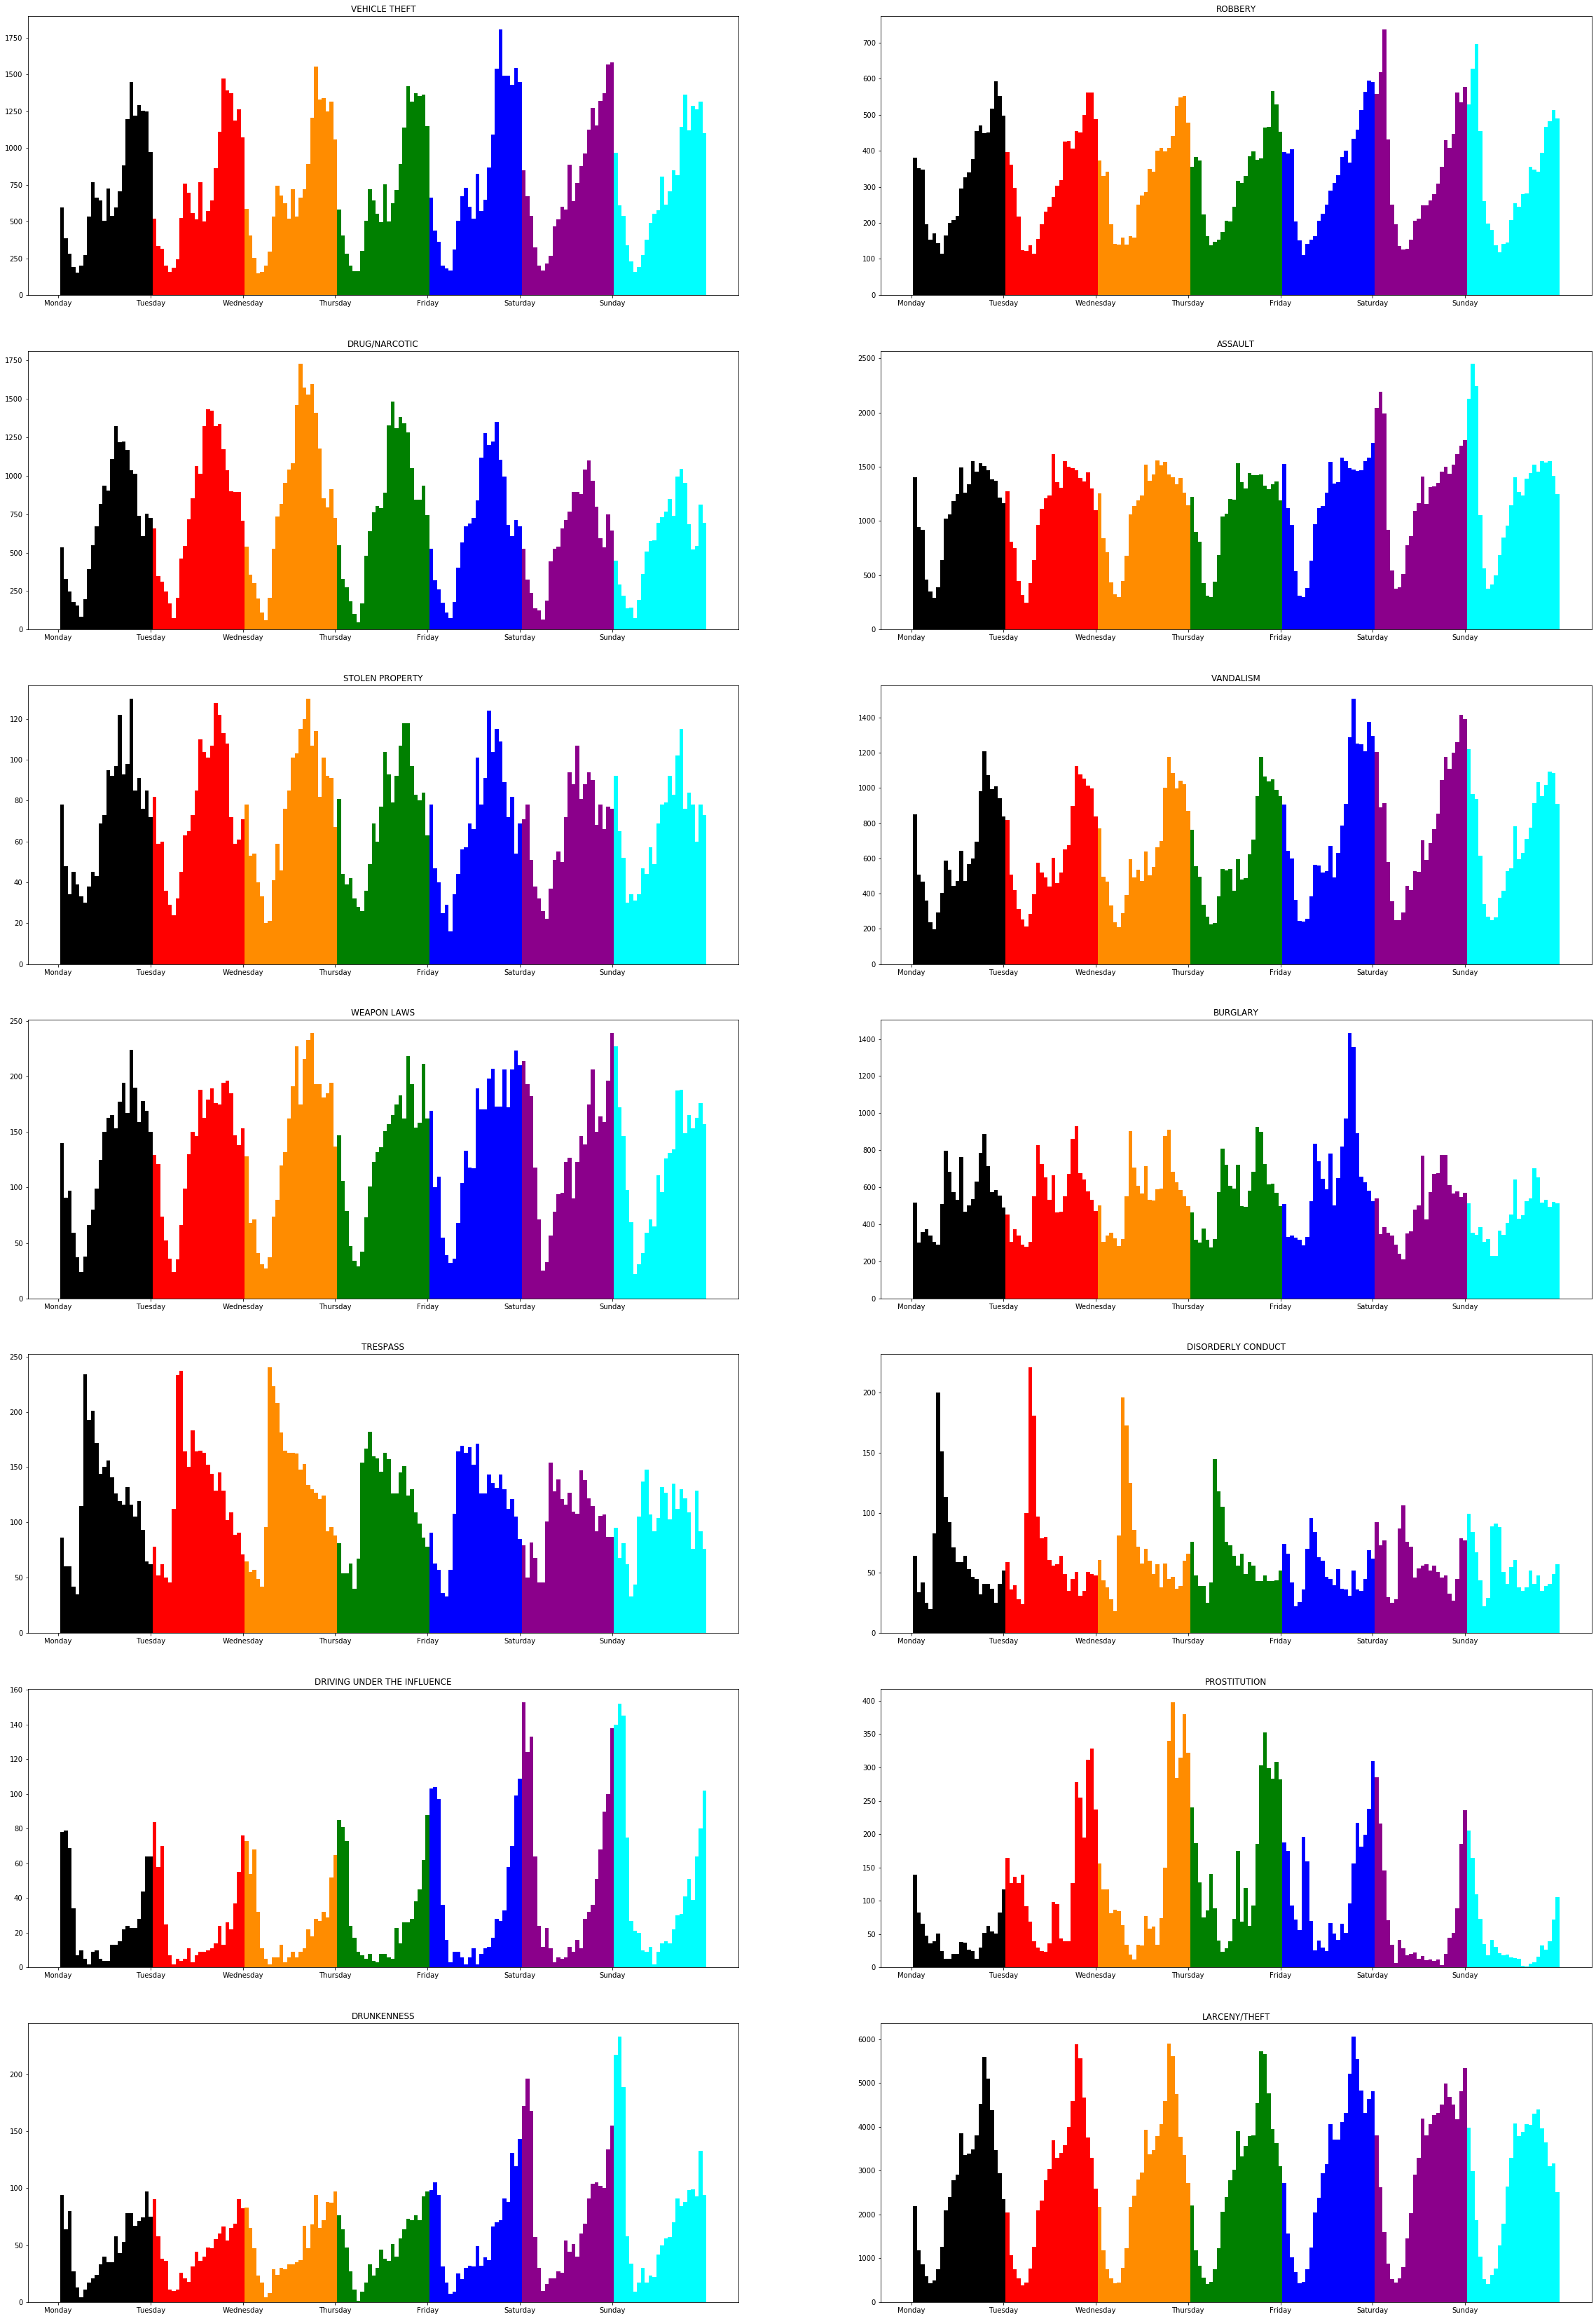

In [10]:
x = np.arange(len(days))
width = 1
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(40,60))
plt.setp(axs, xticklabels=days,xticks=x)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    w=1
    for h in range(24):
        test=np.array(crime_data[(crime_data.Time.dt.hour==h) & (crime_data.Category==crime)].Day_id.value_counts().sort_index())
        axs[i].bar(x+w*(width/24), test,width/24, color=['black', 'red', 'darkorange','green', 'blue','darkmagenta', 'cyan'])
        w+=1
    axs[i].set_title(crime)
    i+=1
plt.show()

The above plots show a number of interesting cases in which the pattern over 24 hourse, stands out for certain days of the week. One such example is **Burglary**. Her it can be observed that esspecially Friday stand out from the rest of days, with a very large peak in the evening. Also for **Assult** the day of the week appear to be influencing the pattern of when reports are made. Here it is Saturday and Sunday that stands out with peaks around midnight. For **Trespass** there is a change in patterns for Sundays where the decline in number of reports there can normally be observed during the day is more flat. At last it can be observed that for **Prostitution** the midday pattern varries from weekdays and weekends.

#  Part 2

## Questions for the first video lecture

***What is the difference between data and metadata? How does that relate to the bike-example?***

While data describe certain recordings, meta data is information about the recordings them self. As in the case of the bike example there is data for heart rate, but there is also data describing where that data was recorded, this is an example of metadata.

***Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.***

I think it can be, as it allows for quick insights that would theoretically be very hard to have reached. The human eye is very good at making sense of visualizations of data and detect patterns that simple theoreticall measures would not pick up on. However if there is only plain non-processed data, the human eye has a hard time extracting general information from this.

***Simpson's paradox is hard to explain. Come up with your own example - or find one online.***

The follwoing example has been obtained thorugh https://blog.revolutionanalytics.com/2013/07/a-great-example-of-simpsons-paradox.html. 

The overall median wage in the US has been increasing. However for each educational subgroup the median wage has been decreassing. This is due to the fact that the distibution between the educational subgroups have changed, with more people obtainging college degrees.

***In your own words, explain the differnece between exploratory and explanatory data analysis.***

Exploratory data analysis is an approach to discover patterns and connections in a data set, where it from the begining is not clear what we are searching for. Explanatory analysis is about communication connections and patterns.

## Questions for the second video lecture

***As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?***

The pearson correlation works by measuring how strongly a change in one varible is associated with a change in another variable. With -1 and 1 being a very strong association, and 0 being no association. The correlation is calculated based on the following formula.

\begin{equation*}
r =\frac{n \sum(xy)-\sum(x)\sum(y)} {\sqrt{[n \sum(x^2)-\sum(x)^2] [n\sum(y^2)-(\sum(y)^2]}}
\end{equation*}
Refference: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/


The Pearson correlation does not work well in cases with outliers, where the resulting coefficient can give missleading results. However in a visualisation it is easy to spot the outliers and observe the overall linear correlation between the variables.

Refference: https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404


***What is the difference between a bar-chart and a histogram?***

In a bar chart there is a bar for each value, displaying the number of occurences of this value.
In a histogram the bars are not for one value each, but instead for bins of values, showing the number of occurences for values within the bin.

***I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.***

There is no perfect rule to determin the bin size, and most rules appear to work best for normally distributed data. However Sturge’s rule does appear to provide a simple starting point for determing the number of bins, and thereby the size of the bins. The formula is 

\begin{equation*}
1 + 3. 322 log(N)
\end{equation*}
Refference: https://www.statisticshowto.datasciencecentral.com/choose-bin-sizes-statistics/

However it is still neccessary to test out different bin-sizes, so it is adjusted to the specific data set.

# Part 3

### Jitter plot: arrest time for assults from June to September 2016, from 13-14.

In [11]:
crime_data1['Time1'] = pd.to_datetime(crime_data1['Time'])
df1 = crime_data1[crime_data1['Category']=='ASSAULT'].set_index('Time1').between_time('12:59:00','14:00:00')
crime_data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Day_id
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,2020-02-29 01:00:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000,1
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,2020-02-29 17:00:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134,3
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,2020-02-29 09:32:00,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085,2
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,2020-02-29 23:10:00,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134,5
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,2020-02-29 13:43:00,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,160648742,NON-CRIMINAL,AIDED CASE,Thursday,08/11/2016,2020-02-29 18:36:00,SOUTHERN,NONE,0 Block of WASHBURN ST,-122.414406,37.775236,POINT (-122.41440629479061 37.77523622314656),16064874251040,3
2215020,160659761,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,08/15/2016,2020-02-29 19:06:00,BAYVIEW,"ARREST, BOOKED",16TH ST / 3RD ST,-122.389103,37.766904,POINT (-122.38910303281254 37.76690372519212),16065976165016,0
2215021,170285083,VEHICLE THEFT,STOLEN TRUCK,Thursday,04/06/2017,2020-02-29 23:30:00,PARK,NONE,800 Block of HAIGHT ST,-122.436214,37.771317,POINT (-122.43621442698411 37.77131718410027),17028508307025,3
2215022,160684605,LOITERING,LODGING IN PARK,Wednesday,08/24/2016,2020-02-29 07:33:00,NORTHERN,NONE,1600 Block of BAY ST,-122.434155,37.802896,POINT (-122.43415507683311 37.80289596016211),16068460519062,2


In [12]:
df1['Date'] = df1.Date +" "+ df1.Time
df1['Date1'] = pd.to_datetime(df1['Date'])


In [13]:
df2 = df1[(df1["Date1"].dt.month >=6) & (df1["Date1"].dt.month <=9)&(df1["Date1"].dt.year == 2016)]


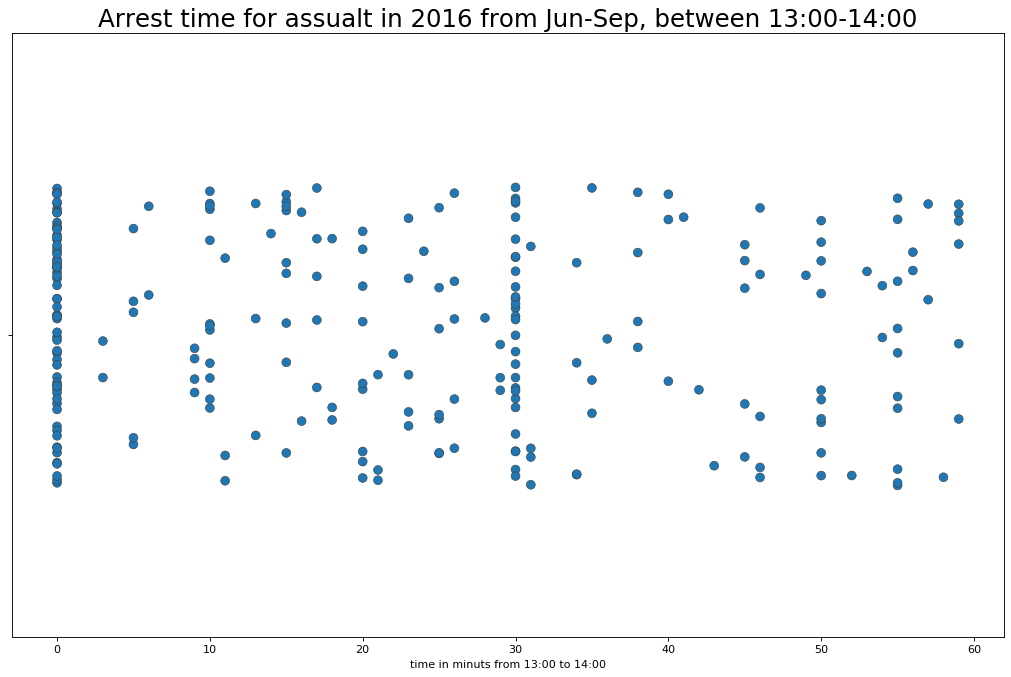

In [14]:
fig,ax = plt.subplots(figsize=(16,10),dpi = 80)

sns.stripplot(df2.Date1.dt.minute,jitter = 0.25,size = 8,ax = ax,linewidth =.5)
plt.title('Arrest time for assualt in 2016 from Jun-Sep, between 13:00-14:00', fontsize=22)
plt.xlabel("time in minuts from 13:00 to 14:00")
plt.show()

The above plot shows that most crimes are recorded exactly at the clock, and at half pass. This does indicate that that time recordings are not made with great precision.

## Histogram

To take a look at the geographical pattern of the crimes, this is here illustrated by showing the distribution of the different crime types in the different districts.

In [15]:
datafocus=crime_data[crime_data['Category'].isin(focuscrimes)]

In [16]:
datafocus

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Day_id
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,2020-02-29 17:00:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134,3
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,2020-02-29 23:10:00,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134,5
7,50908404,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,08/13/2005,2020-02-29 17:00:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.500000,90.000000,POINT (-120.5 90),5090840407021,5
9,111027676,ASSAULT,BATTERY,Saturday,12/24/2011,2020-02-29 07:00:00,SOUTHERN,NONE,0 Block of DORE ST,-122.412933,37.773927,POINT (-122.412933062384 37.7739274524819),11102767604134,5
10,60508925,ASSAULT,BATTERY,Saturday,05/13/2006,2020-02-29 11:26:00,NORTHERN,NONE,POLK ST / CEDAR ST,-122.419835,37.786358,POINT (-122.419834938618 37.7863580362743),6050892504134,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215014,170126722,ASSAULT,BATTERY,Monday,02/13/2017,2020-02-29 19:50:00,NORTHERN,NONE,MCALLISTER ST / FRANKLIN ST,-122.421893,37.779891,POINT (-122.4218931344669 37.77989123361396),17012672204134,0
2215015,160511161,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,06/24/2016,2020-02-29 10:10:00,TARAVAL,NONE,500 Block of JUDAH ST,-122.467791,37.762008,POINT (-122.46779091121964 37.76200811098795),16051116106372,4
2215017,160442986,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,05/30/2016,2020-02-29 19:10:00,CENTRAL,NONE,BAY ST / POWELL ST,-122.411953,37.805824,POINT (-122.41195308361146 37.80582429492737),16044298606244,0
2215018,166167891,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/22/2016,2020-02-29 09:30:00,PARK,NONE,14TH ST / NOE ST,-122.433409,37.767460,POINT (-122.43340929426132 37.767459890623755),16616789106244,4


In [39]:
df2=datafocus.groupby(['Category','PdDistrict']).size().to_frame()

In [40]:
df2

0
Category    PdDistrict       
ASSAULT     BAYVIEW     24812
            CENTRAL     17608
            INGLESIDE   21971
            MISSION     28791
            NORTHERN    21058
...                       ...
WEAPON LAWS PARK          917
            RICHMOND      763
            SOUTHERN     3016
            TARAVAL      1402
            TENDERLOIN   2061

[140 rows x 1 columns]

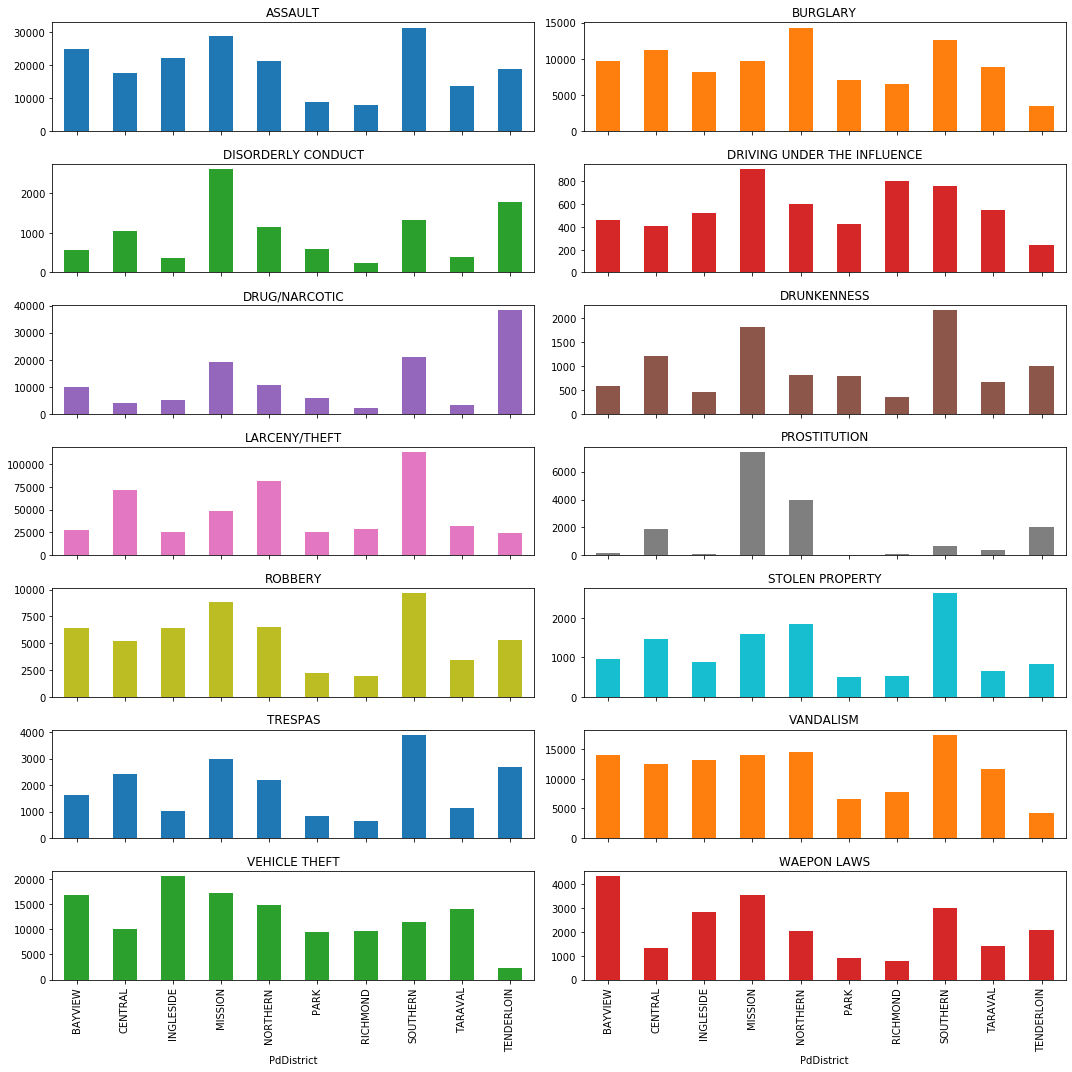

In [43]:
df2.unstack(level=0).plot(kind='bar',subplots=True,sharex=True,layout=(7,2),figsize=(15,15),title=["ASSAULT","BURGLARY","DISORDERLY CONDUCT", "DRIVING UNDER THE INFLUENCE","DRUG/NARCOTIC","DRUNKENNESS","LARCENY/THEFT","PROSTITUTION","ROBBERY","STOLEN PROPERTY","TRESPAS","VANDALISM","VEHICLE THEFT","WAEPON LAWS"],legend=False);
plt.tight_layout()
plt.show()

Based on the above polt "DRUG/NARCOTIC" and "PROSTITUTION" is selected, as they show different geographical patterns. In order to figure out which time period to focus on, we seperatily plot the distribution of these two crime types based on time.

**I AM HERE**

In [20]:
df3=crime_data[(crime_data['Category']=='DRUG/NARCOTIC')| (crime_data['Category']=='PROSTITUTION')]

In [21]:
df3['Time_df']=pd.to_datetime(df3['Time']);

c:\users\clara\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df3['hour']=df3['Time_df'].dt.hour

c:\users\clara\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df3=df3.groupby(['Category','hour']).size().to_frame()

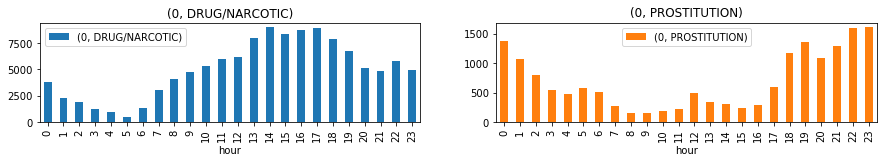

In [24]:
df3.unstack(level=0).plot(kind='bar',subplots=True,sharex=True,layout=(7,2),figsize=(15,15),title="");

Since we want to focus on a period between 1000 and 10000 points,accoding to the results shown above, we are going to choose 18:00~19:00 as the reserch period.Then we will investigate the distribution of these 2 crime accoding to ther latitudes(the GPS locations)

In [25]:
df3=crime_data[(crime_data['Category']=='DRUG/NARCOTIC')| (crime_data['Category']=='PROSTITUTION')]

In [26]:
np.histogram(df3[df3['Category']=='DRUG/NARCOTIC']['Y'],50)

(array([119621,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      7], dtype=int32),
 array([37.7081536 , 38.75399053, 39.79982746, 40.84566438, 41.89150131,
        42.93733824, 43.98317517, 45.0290121 , 46.07484902, 47.12068595,
        48.16652288, 49.21235981, 50.25819674, 51.30403366, 52.34987059,
        53.39570752, 54.44154445, 55.48738138, 56.5332183 , 57.57905523,
        58.62489216, 59.67072909, 60.71656602, 61.76240294, 62.80823987,
        63.8540768 , 64.89991373, 65.94575066, 66.99158758, 68.03742451,
        69.08326144, 70.12909837, 71.1749353 , 72.22077222, 73.26660915,
        74.3124460

In [27]:
np.histogram(df3[df3['Category']=='PROSTITUTION']['Y'],50)

(array([16699,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     2], dtype=int32),
 array([37.7107673 , 38.75655195, 39.8023366 , 40.84812126, 41.89390591,
        42.93969057, 43.98547522, 45.03125987, 46.07704453, 47.12282918,
        48.16861384, 49.21439849, 50.26018314, 51.3059678 , 52.35175245,
        53.39753711, 54.44332176, 55.48910641, 56.53489107, 57.58067572,
        58.62646038, 59.67224503, 60.71802969, 61.76381434, 62.80959899,
        63.85538365, 64.9011683 , 65.94695296, 66.99273761, 68.03852226,
        69.08430692, 70.13009157, 71.17587623, 72.22166088, 73.26744553,
        74.31323019, 75.35901484, 76.4047995 , 77.45058415, 78.4963688 ,
   

After doing the np.histogram, some errors are noticed.Because most data seem aggregated in the first bin,while other bins are empty except for the last bin. Hereby,'Y', which means latitude, with number near 90 is unreasonable because the real location for it will be the North Pole.So it better to drop data with 'Y' value more than 80.

In [28]:
df4=df3[df3['Y']<80]

In [29]:
np.histogram(df4[df4['Category']=='PROSTITUTION']['Y'],50)

(array([  20,   10,  120,   71,   10,   26,    9,   26,   12,    4,   10,
           3,   16,    8,   20,   19,   28,   12,   11,   11,   38,   85,
         190,  439, 2300, 1398, 2261,  832,   50,   24,   15,   48,  153,
          54,   27,   55,  297, 2469, 2830, 1222, 1127,   93,  103,   24,
          55,   42,    3,   11,    6,    2], dtype=int32),
 array([37.7107673 , 37.71275604, 37.71474478, 37.71673352, 37.71872227,
        37.72071101, 37.72269975, 37.7246885 , 37.72667724, 37.72866598,
        37.73065472, 37.73264347, 37.73463221, 37.73662095, 37.7386097 ,
        37.74059844, 37.74258718, 37.74457592, 37.74656467, 37.74855341,
        37.75054215, 37.7525309 , 37.75451964, 37.75650838, 37.75849713,
        37.76048587, 37.76247461, 37.76446335, 37.7664521 , 37.76844084,
        37.77042958, 37.77241833, 37.77440707, 37.77639581, 37.77838455,
        37.7803733 , 37.78236204, 37.78435078, 37.78633953, 37.78832827,
        37.79031701, 37.79230575, 37.7942945 , 37.79628324, 3

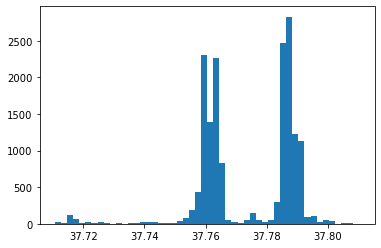

In [30]:
plt.hist(df4[df4['Category']=='PROSTITUTION']['Y'],50);

In [31]:
np.histogram(df4[df4['Category']=='DRUG/NARCOTIC']['Y'],50)

(array([  304,   817,   906,   656,   622,   756,   911,   593,   684,
         1642,  1172,  1534,  2274,   987,   620,   661,   403,  1004,
         1117,  1503,  1267,  1467,   819,  1696,  2948,  9015,  1554,
         4911,  2210,  1794,  3998,  3596, 16712, 25706, 15180,  3152,
         1341,   551,   437,   441,   733,   354,   200,   206,   134,
           29,     0,     0,     0,     4], dtype=int32),
 array([37.7081536 , 37.71039004, 37.71262648, 37.71486291, 37.71709935,
        37.71933579, 37.72157223, 37.72380866, 37.7260451 , 37.72828154,
        37.73051798, 37.73275442, 37.73499085, 37.73722729, 37.73946373,
        37.74170017, 37.74393661, 37.74617304, 37.74840948, 37.75064592,
        37.75288236, 37.75511879, 37.75735523, 37.75959167, 37.76182811,
        37.76406455, 37.76630098, 37.76853742, 37.77077386, 37.7730103 ,
        37.77524674, 37.77748317, 37.77971961, 37.78195605, 37.78419249,
        37.78642892, 37.78866536, 37.7909018 , 37.79313824, 37.79537468,
   

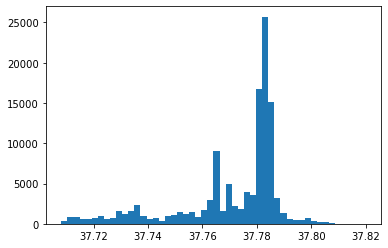

In [32]:
plt.hist(df4[df4['Category']=='DRUG/NARCOTIC']['Y'],50);

# Part 5

In [33]:
import folium
#pip install folium
#conda install -c conda-forge folium

ModuleNotFoundError: No module named 'folium'

#### plot a map of San Francisco with its longitude and latitude and add the marker for SF City Hall

In [ ]:
lat = 37.773972
lon = -122.431297
#clat = 55.676098
#clon = 12.568337
t_list = ["San Francisco", "SF City Hall"]
San = folium.Map([lat, lon],t_list = "San Francisco", tiles='cartodbpositron',zoom_start=13)
San1 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)
San2 = folium.Map([lat, lon],t_list = "San Francisco" , tiles='cartodbpositron',zoom_start=13)
San3 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)
San4 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)
San5 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)

In [ ]:
folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(San)
San

In [ ]:
df3 = crime_data1[crime_data1['Category']=='DRUG/NARCOTIC']
df3['Date'] = crime_data1.Date +" " + crime_data1.Time
df3['Date1'] = pd.to_datetime(df3['Date'])


In [ ]:
df4=df3[(df3["Date1"].dt.month == 6) &(df3["Date1"].dt.year == 2016)]


In [ ]:
for i in range (int(len(df4.X))):
    folium.Marker([df4.Y.iloc[i], df4.X.iloc[i]],icon=folium.Icon(color='red')).add_to(San)
    
San

#### Heat Map

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

In [ ]:

df5 = crime_data1[crime_data1['Category']=='SEX OFFENSES, NON FORCIBLE']
df5['Date'] = crime_data1.Date +" "+ crime_data1.Time
df5['Date1'] = pd.to_datetime(df5['Date'])


df5 = df5[['Y', 'X']]
#heat_df = heat_df[[df5.Y,df5.X]]
df5 = df5.dropna(axis=0, subset=['Y','X'])
# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in df5.iterrows()]
HeatMap(heat_data).add_to(San1)
San1

#### comment on the differences between scatter plots and heatmaps.

By scatter plots we digitally observing each individual data point more clearly.Moreover, more statistical analysis which need physical measurement can be applied,such as measuring the distance between two crime case and summing up all crime cases at one street.Overall,the scatter plots focus more on the details than heatmaps 

By heatmaps we observing the data points cluster more clearly.It allowed us to easily distinguish the area where crimes happens more often then other area. 

#### play around with the heatmap

In [ ]:
df5

In [ ]:
folium.plugins.BeautifyIcon(icon='plane',icon_shape='rectangle-dot', border_color='#b3334f', text_color='#b3334f').add_to(San2)
folium.plugins.FloatImage('DTU_Logoforklaring_Frit-Copy-4aaaa-compressor.jpg', bottom=75, left=75).add_to(San2)
San2

In [ ]:
mapplay =folium.plugins.DualMap(location=(55.676098, 12.568337), tiles='cartodbpositron', zoom_start=12)
mapplay

Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom).

In [ ]:
San1

In [ ]:
HeatMap(heat_data,radius=20).add_to(San3)
San3

%need to be changed

The smaller radius stands for smaller coverage of each data point. Visually,it makes the red area samller as the most data points have a bit distance between each other.We can observe from plot the most crime happens at a quite small area in that building on the 800 block of Bryant stree, which is the same as the given example.

In [ ]:
# max_zoom 
HeatMap(heat_data,max_zoom=1).add_to(San4)
San4

max_room stands , low -> make it look more intense, because of getting full capacity far away. 

#### In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words.

As reference{https://www.yelp.com/biz/hall-of-justice-san-francisco} stated, the 800 block of Bryant street is the location next to hall of justice, where policement arrest the criminals at that placed.In that case,we have more 'datapoints' clusterred at that location which made it into a hotspot.

#### heat map movie

In [ ]:
# 'DRIVING UNDER THE INFLUENCE' daily 
#'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'
df6 = crime_data2[crime_data2['Category']=='DRIVING UNDER THE INFLUENCE']
df6['Date'] = crime_data2.Date +" "+ crime_data2.Time
df6['Date1'] = pd.to_datetime(df6['Date'])

df6=df6[(df6.DayOfWeek =='Friday')|(df6.DayOfWeek =='Saturday')|(df6.DayOfWeek =='Sunday') ]
#&(df6.DayOfWeek =='Thursday')&(df6.DayOfWeek =='Saturday')&(df6.DayOfWeek =='Sunday')]
df6

df6['Weight'] = df6.Date1.dt.hour+df6.Date1.dt.minute/60
df6 = df6[['Y', 'X','Weight']]
df6['Weight'] = df6['Weight'].astype(float)
df6 = df6.dropna(axis=0, subset=['Y','X','Weight'])


# Create weight column, using Date.time


# List comprehension to make out list of lists
heat_data1 = [[[row['Y'],row['X']] for index, row in df6[df6['Weight'] == i].iterrows()] for i in range(0,24)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data1,auto_play=True,radius=50,max_opacity=0.8)
hm.add_to(San5)

San5

Our heatmap is mapped with 24hours scalled from Friday to Sunday within crime type 'DRIVING UNDER THE INFLUENCE'.


It reveals that on the night period(23:00 to 6:00),the frequency of cime is higher than other time,which make sense as more people drink alchol during this period.This crime type and time period is a strong hypothesis which should be easier to see the difference.

# Part 6

In each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

***In the hourly activity for PROSTITUTION something surprising is going on on Thursday:*** This potential error may lead data users to think about whether there is a special relationship between "prostitution "and "Thursday" which may require extra data and information. For the binned data, this error may break the systematical pattern for the whole dataset. If this error is not noticed fo this model. the data user may conclude that there isn't a clear trend for this type of crime when in fact it has.
On the other hand, maybe there are more crimes these days, but they are not supposed to be that extremely high because as the bin plot shows, it goes suddenly too low after the highest point.


***More crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers:*** This does create a bias when the data is binned to illustrate the hourly crime activety. This is due to the fact that reports is moved from one bin to the next, when the time is rounded to the next hour. If this error is not noticed, it can lead to the conclusion that the highest rate of crime on the hour. However the precision of the records does not allow for such conclusions.

***The Hall of Justice seemed to be an unlikely hotspot for sex offences:*** Since the hall of justice is the headquarter of the police, it is to be expected that alot of reports will be filled there, for crimes that did not occure there. However if there is not an awareness of this special case, and the location is allways treated as the location at which the crime occure, it will as lead to the conclusion that there is a seriouse problem within the police department.